### Bayesian data analysis
##  Chapter 6, demo 2

Posterior predictive checking  
Binomial example - Testing sequential dependence example

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os, sys
# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
# Testing sequential dependence example (Gelman et al p. 163)
y = np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
Ty = np.count_nonzero(np.diff(y))

# sufficient statistics
n = len(y)
s = y.sum()

nsamp = 10000
t = np.random.beta(s+1, n-s+1, size=nsamp)
yr = np.random.rand(n, nsamp) < t
# sadly np.count_nonzero does not (yet) support axis parameter
Tyr = (np.diff(yr, axis=0) != 0).sum(axis=0)

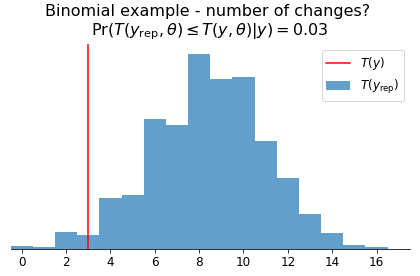

In [5]:
# plot
plt.hist(
    Tyr,
    np.arange(19),
    align='left',
    label='$T(y_\mathrm{rep})$',
    color=plot_tools.lighten('C0', 0.3)
)
plt.axvline(Ty, color='red', label='$T(y)$')
plt.xlim((-0.5, 17.5))
plt.title(
    'Binomial example - number of changes? \n'
    r'$\operatorname{Pr}(T(y_\mathrm{rep},\theta) \leq T(y,\theta)|y) = 0.03$',
    fontsize=16
)
plt.legend()
plot_tools.modify_axes.only_x(plt.gca())
plt.tight_layout()